IMPORT LIBRARIES

In [9]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
from cellpose import models
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from tifffile import imsave
from PIL import Image

import skimage.io
time.sleep(0.5)


LOAD DATA

100%|██████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 1018.57it/s]


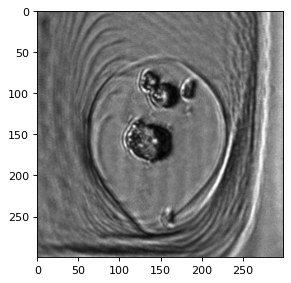

In [44]:
stack_BF = io.imread('C:\\Users\\Amaury\\Documents\\Incubascope\\mur_epais_BF_2.tif')

from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)
plt.imshow(stack_BF[1,:,:],cmap='gray')

TEST CELLPOSE ON A SINGLE IMAGE

In [63]:
data=stack_BF[15,:,:];
# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')
channels = [0,0] # IF YOU HAVE GRAYSCALE
masks, flows, styles, diams = model.eval(data, diameter=130, channels=channels)

# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(50,20))
plot.show_segmentation(fig, data, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

EXTRACT DIAMETER SIZE AND AREA

In [64]:
DIAM=utils.diameters(masks)
dd=DIAM[1];
dd=dd[0]
print('diameter capsule=',dd,'pixel')

perimeters = utils.get_mask_perimeters(masks)
npoints = np.unique(masks, return_counts=True)[1][1:]
areas = npoints
Area=areas[0]
print('Area of the capsule = ',Area,'pixel')

diameter capsule= 156.03525242713584 pixel
Area of the capsule =  24347 pixel


In [60]:
RUN OVER THE LOOP

(184,)

In [89]:
n=np.shape(stack_BF)
MM=np.zeros([n[0],n[1],n[2]])
np.sqrt(np.sum(MM))

AA=np.zeros(184)
DD=np.zeros(184)

for ii in range(0,95,2):
    data=stack_BF[ii,:,:];
    model = models.Cellpose(gpu=False, model_type='cyto')
    channels = [0,0] # IF YOU HAVE GRAYSCALE
    masks, flows, styles, diams = model.eval(data, diameter=80, channels=channels)
    perimeters = utils.get_mask_perimeters(masks)
    npoints = np.unique(masks, return_counts=True)[1][1:]
    areas = npoints
    Area=areas[0]
    AA[ii]=Area;
    DIAM=utils.diameters(masks)
    dd=DIAM[1];
    dd=dd[0]
    DD[ii]=dd;

    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [90]:
ii

84

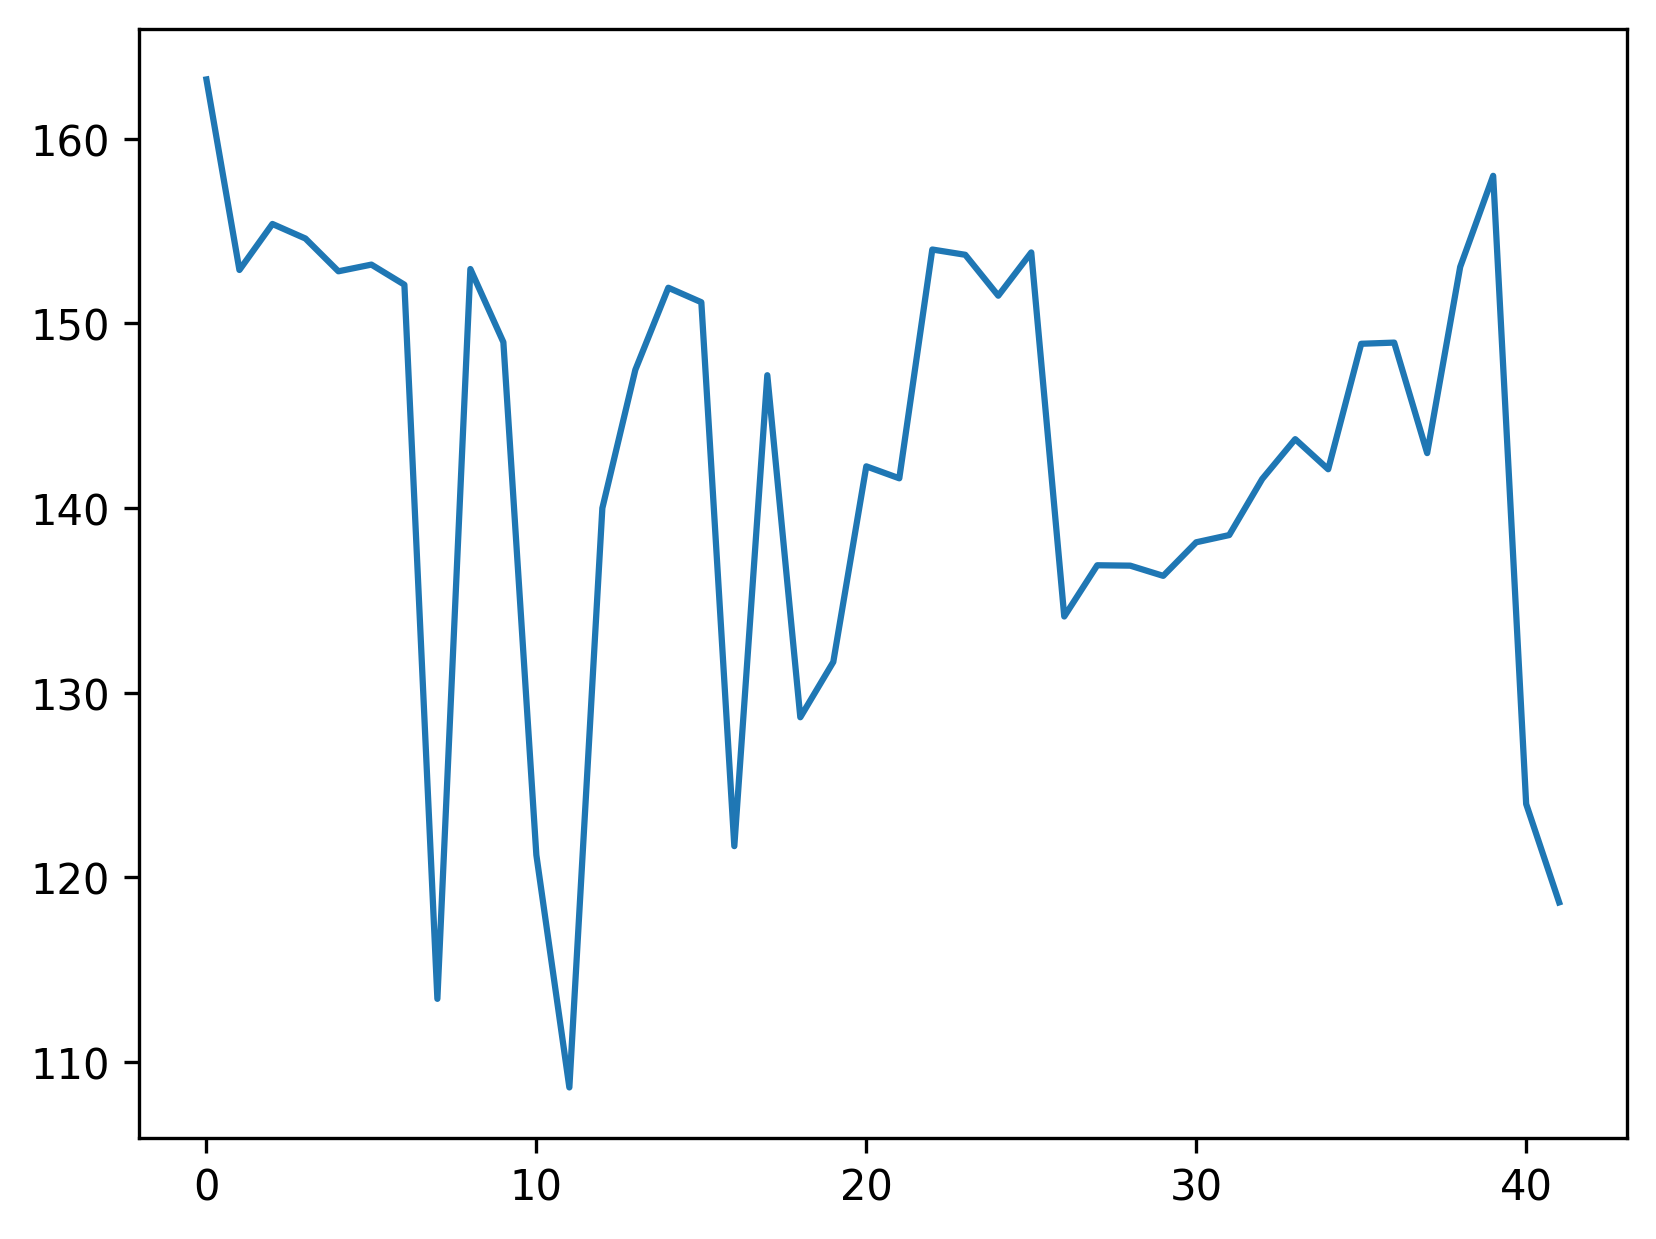

In [95]:
plt.plot(DD[0:84:2])